# Objective :
The objective of this project is to build a machine learning model that predicts employee attrition (whether employees are likely to leave the organization) based on various employee-related features. Steps involve data preprocessing, exploratory data analysis, feature selection or engineering, data splitting, model selection, training, evaluation, and deployment. Once deployed, the model will be integrated into the HR support system

# Problem Statement :
We are building this machine learning model to proactively address employee attrition within our organization. Predicting attrition based on employee attributes and historical data will enable us to identify employees at risk of leaving, allowing HR to take preemptive measures to retain them. By implementing this model, we aim to improve employee satisfaction, reduce turnover, and optimize workforce management, ultimately fostering a more stable and productive work environment. This initiative aligns with our commitment to nurturing our talent, enhancing organizational performance, and ensuring the long-term success of our company.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8 (1).xls')

In [3]:
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [4]:
df['EmpJobSatisfaction'].value_counts()

4    378
3    354
2    237
1    231
Name: EmpJobSatisfaction, dtype: int64

In [5]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [6]:
df.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,...,1,4,3,3,2,2,2,0,Yes,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

#### We have 1200 Rows and 28 columns in which 19 columns have int datatype and 9 have object datatype and memory usages by this data is 262.6+ KB with no null values present

In [8]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [9]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [10]:
for i in df:
    print(i)
    print(df[i].unique())

EmpNumber
['E1001000' 'E1001006' 'E1001007' ... 'E100994' 'E100995' 'E100998']
Age
[32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 52 33 25 45 23
 26 54 37 24 49 55 43 51 22 31 58 20 21 48 19 18 59 46 57]
Gender
['Male' 'Female']
EducationBackground
['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
MaritalStatus
['Single' 'Married' 'Divorced']
EmpDepartment
['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
EmpJobRole
['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
BusinessTravelFrequency
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DistanceFromHome
[10 14  5 16  8  1 24  3 2

# Check null values

In [11]:
df.isnull().sum()/len(df)*100

EmpNumber                       0.0
Age                             0.0
Gender                          0.0
EducationBackground             0.0
MaritalStatus                   0.0
EmpDepartment                   0.0
EmpJobRole                      0.0
BusinessTravelFrequency         0.0
DistanceFromHome                0.0
EmpEducationLevel               0.0
EmpEnvironmentSatisfaction      0.0
EmpHourlyRate                   0.0
EmpJobInvolvement               0.0
EmpJobLevel                     0.0
EmpJobSatisfaction              0.0
NumCompaniesWorked              0.0
OverTime                        0.0
EmpLastSalaryHikePercent        0.0
EmpRelationshipSatisfaction     0.0
TotalWorkExperienceInYears      0.0
TrainingTimesLastYear           0.0
EmpWorkLifeBalance              0.0
ExperienceYearsAtThisCompany    0.0
ExperienceYearsInCurrentRole    0.0
YearsSinceLastPromotion         0.0
YearsWithCurrManager            0.0
Attrition                       0.0
PerformanceRating           

In [12]:
df.drop('EmpNumber',axis=1,inplace=True)

# separating cat and num columns

In [13]:
cat_col=df.select_dtypes(object)
cat_col

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
0,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
1,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
2,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No
3,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No
4,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
...,...,...,...,...,...,...,...,...
1195,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,Yes,No
1196,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,No,No
1197,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,Yes,No
1198,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,No,No


In [14]:
num_col=df.select_dtypes([int,float])
num_col

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,32,10,3,4,55,3,2,4,1,12,4,10,2,2,10,7,0,8,3
1,47,14,4,4,42,3,2,1,2,12,4,20,2,3,7,7,1,7,3
2,40,5,4,4,48,2,3,1,5,21,3,20,2,3,18,13,1,12,4
3,41,10,4,2,73,2,5,4,3,15,2,23,2,2,21,6,12,6,3
4,60,16,4,1,84,3,2,1,8,14,4,10,1,3,2,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,3,1,4,71,4,2,4,1,20,2,6,3,3,6,5,0,4,4
1196,37,10,2,4,80,4,1,4,3,17,1,4,2,3,1,0,0,0,3
1197,50,28,1,4,74,4,1,3,1,11,3,20,3,3,20,8,3,8,3
1198,34,9,3,4,46,2,3,2,1,14,2,9,3,4,8,7,7,7,3


In [15]:
for i in cat_col:
    print(i)
    print(cat_col[i].unique())

Gender
['Male' 'Female']
EducationBackground
['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
MaritalStatus
['Single' 'Married' 'Divorced']
EmpDepartment
['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
EmpJobRole
['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
BusinessTravelFrequency
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
OverTime
['No' 'Yes']
Attrition
['No' 'Yes']


In [16]:
for i in num_col:
    print(i)
    print(num_col[i].unique())

Age
[32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 52 33 25 45 23
 26 54 37 24 49 55 43 51 22 31 58 20 21 48 19 18 59 46 57]
DistanceFromHome
[10 14  5 16  8  1 24  3 27 19  9  2  7  6 26 11 23 13 29 12  4 25 21 18
 20 17 22 28 15]
EmpEducationLevel
[3 4 2 5 1]
EmpEnvironmentSatisfaction
[4 2 1 3]
EmpHourlyRate
[ 55  42  48  73  84  32  54  67  63  81  49  99  57  96  44  86  83  61
  80  31  46  79  77  60  76  41  71  66  38  72  95  82  75  93  64  36
  69  33  35  40  43  51  52  98  45  37  94  59  88  50  65  53  56  78
  74  91  62  87  68  34  70 100  92  39  97  47  90  85  30  58  89]
EmpJobInvolvement
[3 2 1 4]
EmpJobLevel
[2 3 5 1 4]
EmpJobSatisfaction
[4 1 2 3]
NumCompaniesWorked
[1 2 5 3 8 7 9 4 6 0]
EmpLastSalaryHikePercent
[12 21 15 14 13 23 11 20 19 17 18 22 16 24 25]
EmpRelationshipSatisfaction
[4 3 2 1]
TotalWorkExperienceInYears
[10 20 23  9  4 28  1  7 12 30  5  2 19 16 34  6  8 11 17  3 14 26 13 22
  0 29 18 35 33 31 24 15 32 21 27 25 36 37 38 40]
Train

# Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
for i in cat_col:
    cat_col[i]=le.fit_transform(cat_col[i])
    print(cat_col[i].unique())
    print(le.classes_)

[1 0]
['Female' 'Male']
[2 1 0 3 4 5]
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
[2 1 0]
['Divorced' 'Married' 'Single']
[5 3 1 0 4 2]
['Data Science' 'Development' 'Finance' 'Human Resources'
 'Research & Development' 'Sales']
[13  8  3 14  6 15  1 16  7 10 12  5 11  9  4 17  0 18  2]
['Business Analyst' 'Data Scientist' 'Delivery Manager' 'Developer'
 'Finance Manager' 'Healthcare Representative' 'Human Resources'
 'Laboratory Technician' 'Manager' 'Manager R&D' 'Manufacturing Director'
 'Research Director' 'Research Scientist' 'Sales Executive'
 'Sales Representative' 'Senior Developer' 'Senior Manager R&D'
 'Technical Architect' 'Technical Lead']
[2 1 0]
['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
[0 1]
['No' 'Yes']
[0 1]
['No' 'Yes']


In [19]:
new_df=pd.concat([cat_col,num_col],axis=1)

In [20]:
new_df

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition,Age,DistanceFromHome,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,1,2,2,5,13,2,0,0,32,10,...,12,4,10,2,2,10,7,0,8,3
1,1,2,2,5,13,2,0,0,47,14,...,12,4,20,2,3,7,7,1,7,3
2,1,1,1,5,13,1,1,0,40,5,...,21,3,20,2,3,18,13,1,12,4
3,1,0,0,3,8,2,0,0,41,10,...,15,2,23,2,2,21,6,12,6,3
4,1,2,2,5,13,2,0,0,60,16,...,14,4,10,1,3,2,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0,3,0,5,13,1,1,0,27,3,...,20,2,6,3,3,6,5,0,4,4
1196,1,1,2,1,15,2,0,0,37,10,...,17,1,4,2,3,1,0,0,0,3
1197,1,3,1,1,15,2,1,0,50,28,...,11,3,20,3,3,20,8,3,8,3
1198,0,3,2,0,1,2,0,0,34,9,...,14,2,9,3,4,8,7,7,7,3


In [21]:
new_df.columns

Index(['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
       'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition', 'Age',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent',
       'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears',
       'TrainingTimesLastYear', 'EmpWorkLifeBalance',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')

# EDA

# Numerical columns distribution

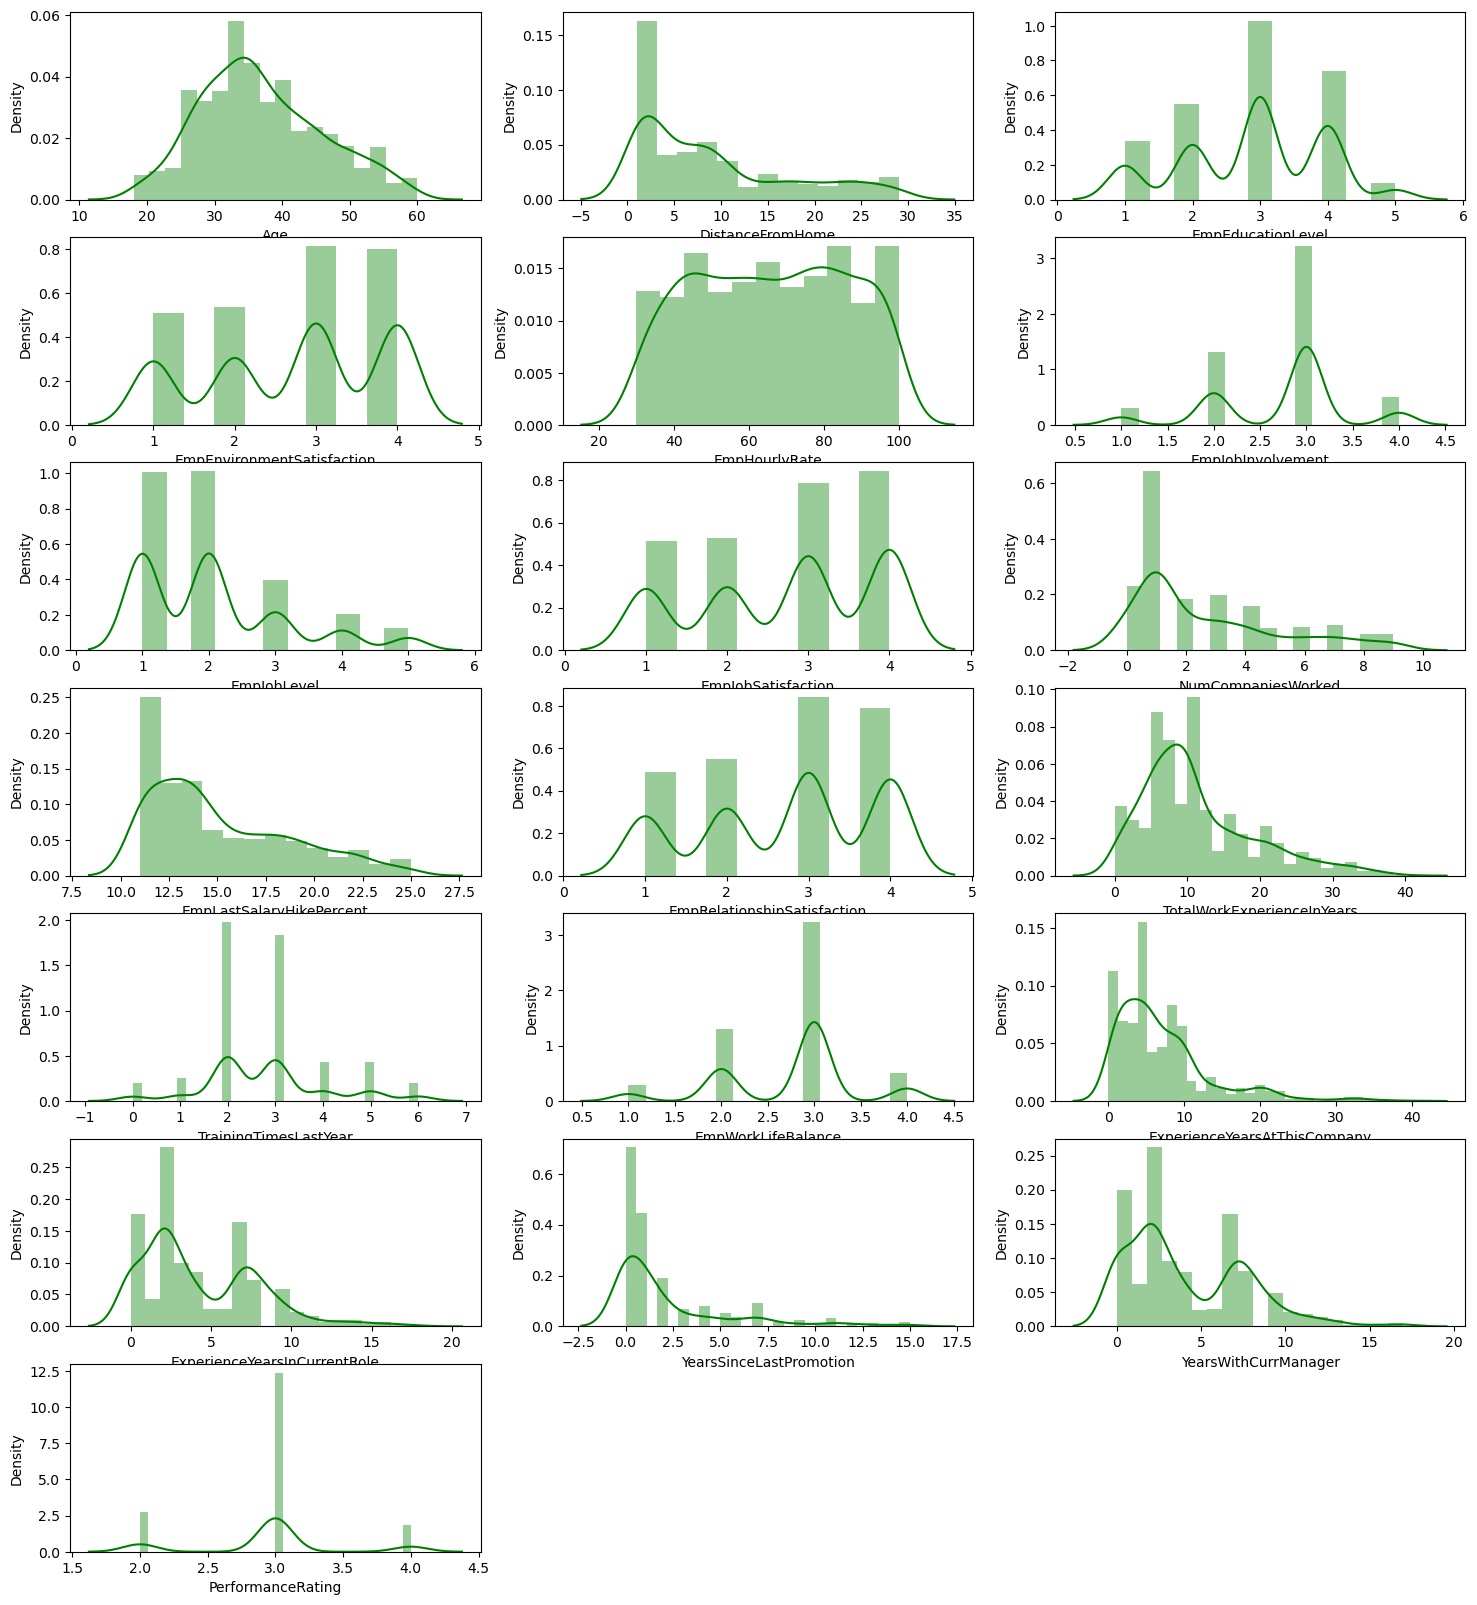

In [22]:
plt.figure(figsize= (18,20))
count=1
for i in num_col:
    
    plt.subplot(7,3,count)
    sns.distplot(num_col[i],color='green')
    count+=1
plt.show()

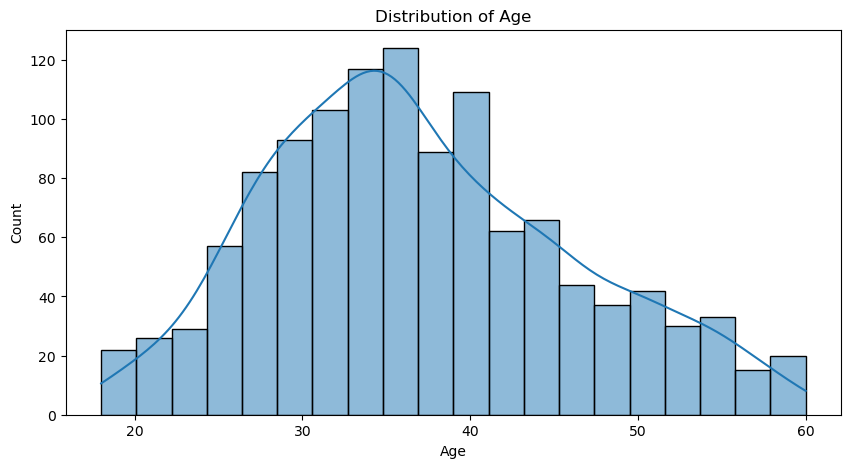

In [23]:
# Visualize the distribution of Age
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.show()

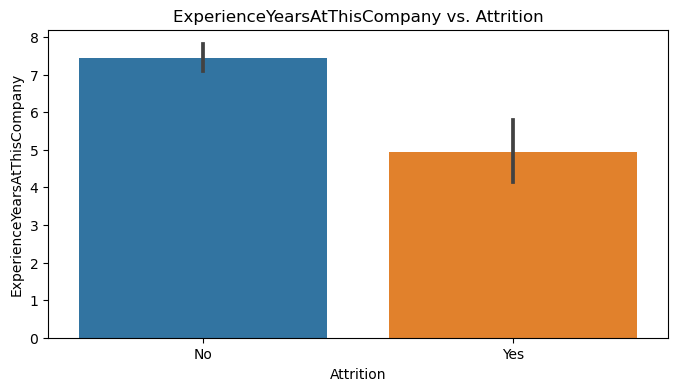

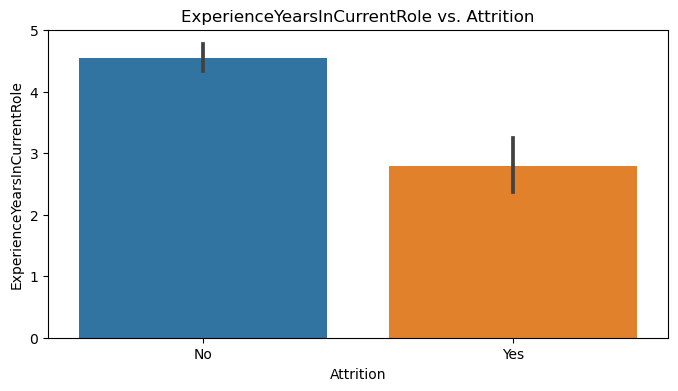

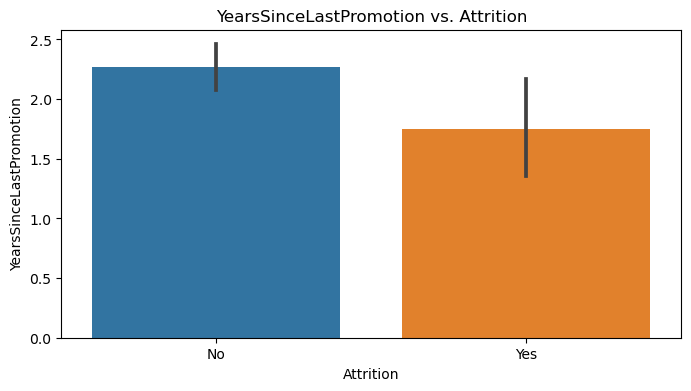

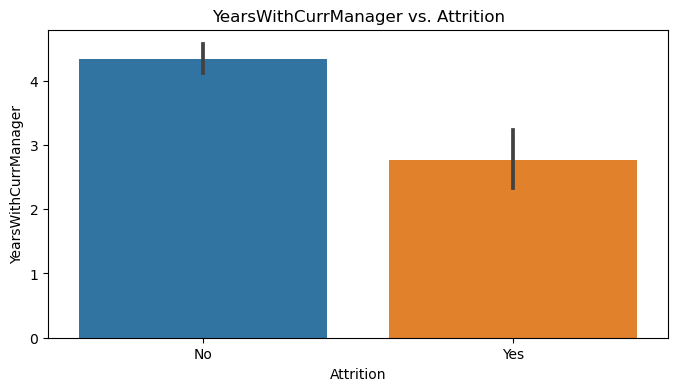

In [24]:
# Time-related variables
time_related_cols = ['ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
                     'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Visualize time-related variables with respect to Attrition
for col in time_related_cols:
    plt.figure(figsize=(8, 4))
    sns.barplot(x='Attrition', y=col, data=df)
    plt.xlabel('Attrition')
    plt.ylabel(col)
    plt.title(f'{col} vs. Attrition')
    plt.show()


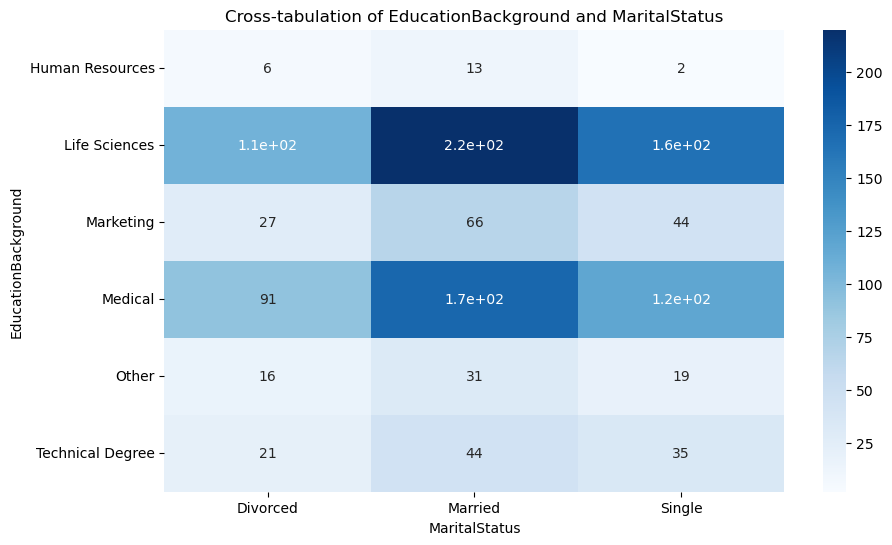

In [25]:
# Cross-tabulation of EducationBackground and MaritalStatus
cross_tab = pd.crosstab(df['EducationBackground'], df['MaritalStatus'])
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues')
plt.xlabel('MaritalStatus')
plt.ylabel('EducationBackground')
plt.title('Cross-tabulation of EducationBackground and MaritalStatus')
plt.show()


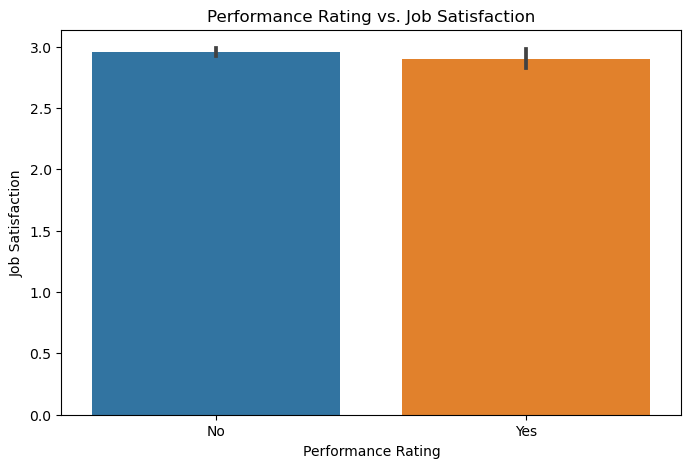

In [26]:
# Box plot of PerformanceRating vs. JobSatisfaction
plt.figure(figsize=(8, 5))
sns.barplot(y='PerformanceRating', x='Attrition', data=df)
plt.xlabel('Performance Rating')
plt.ylabel('Job Satisfaction')
plt.title('Performance Rating vs. Job Satisfaction')
plt.show()


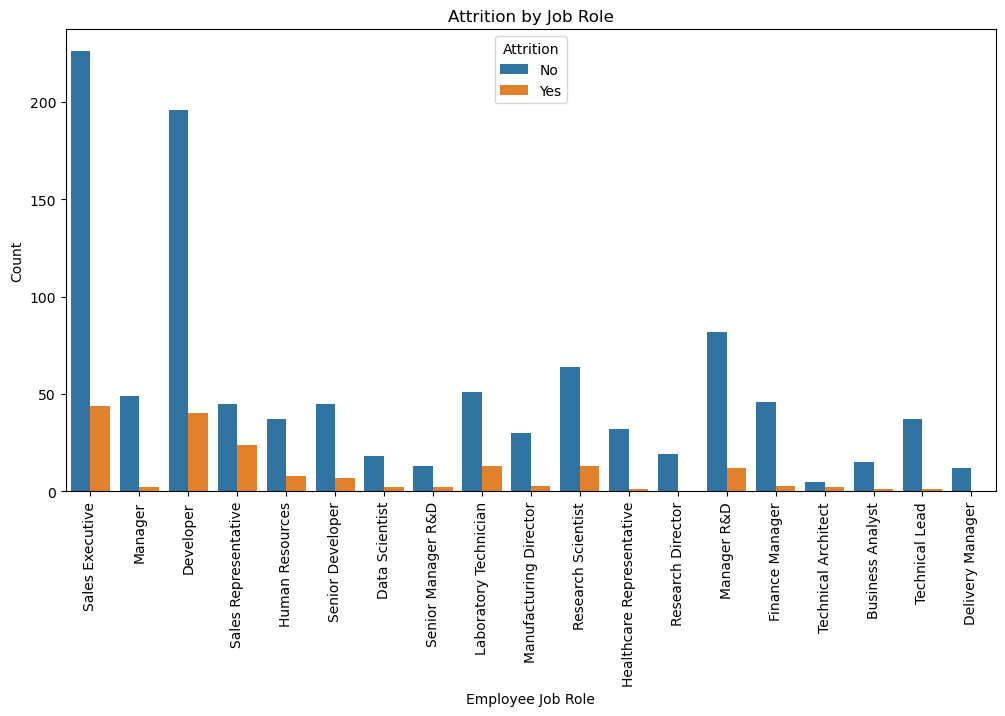

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x='EmpJobRole', hue='Attrition', data=df)
plt.xlabel('Employee Job Role')
plt.ylabel('Count')
plt.title('Attrition by Job Role')
plt.xticks(rotation=90)
plt.show()


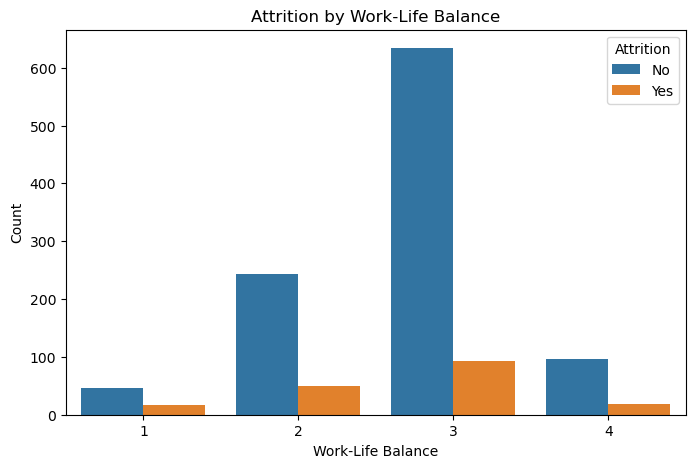

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(x='EmpWorkLifeBalance', hue='Attrition', data=df)
plt.xlabel('Work-Life Balance')
plt.ylabel('Count')
plt.title('Attrition by Work-Life Balance')
plt.show()


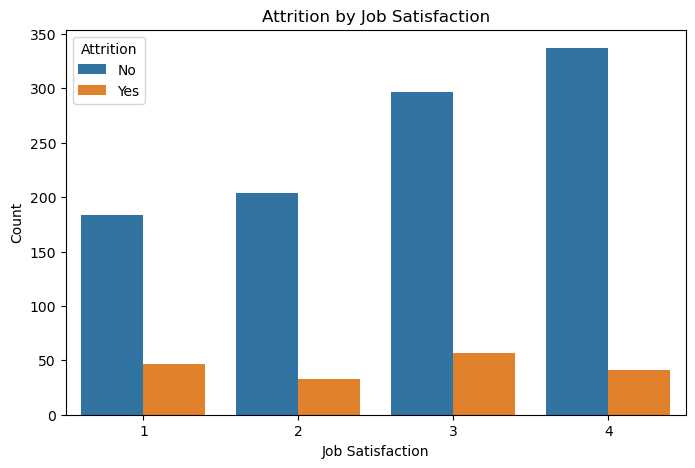

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(x='EmpJobSatisfaction', hue='Attrition', data=df)
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.title('Attrition by Job Satisfaction')
plt.show()


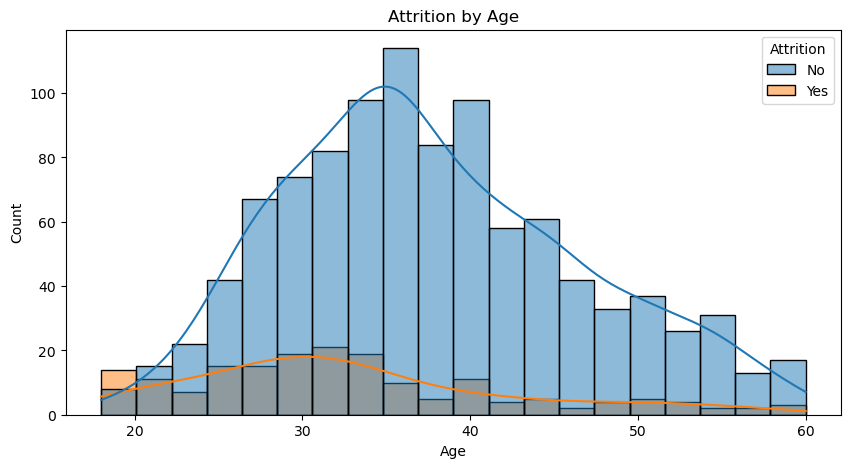

In [30]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Age', hue='Attrition', bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Attrition by Age')
plt.show()


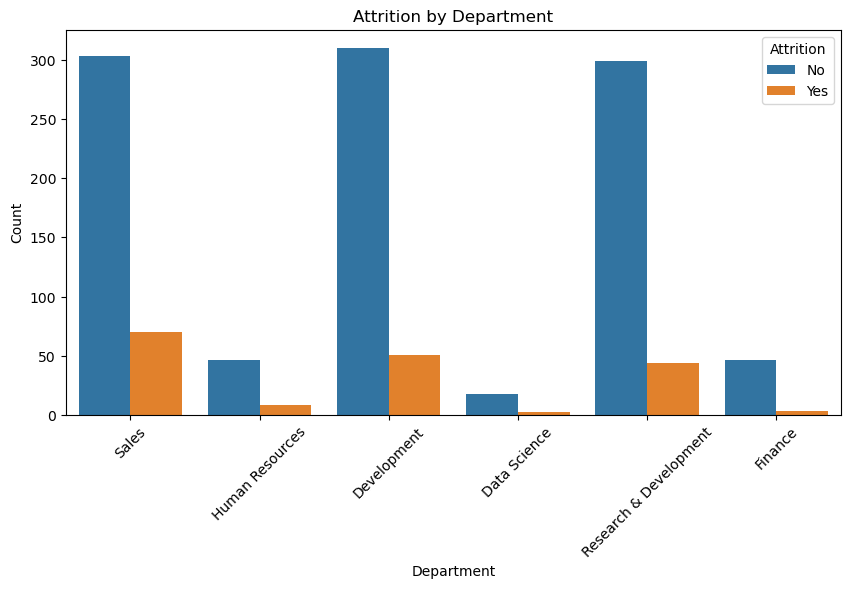

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(x='EmpDepartment', hue='Attrition', data=df)
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Attrition by Department')
plt.xticks(rotation=45)
plt.show()


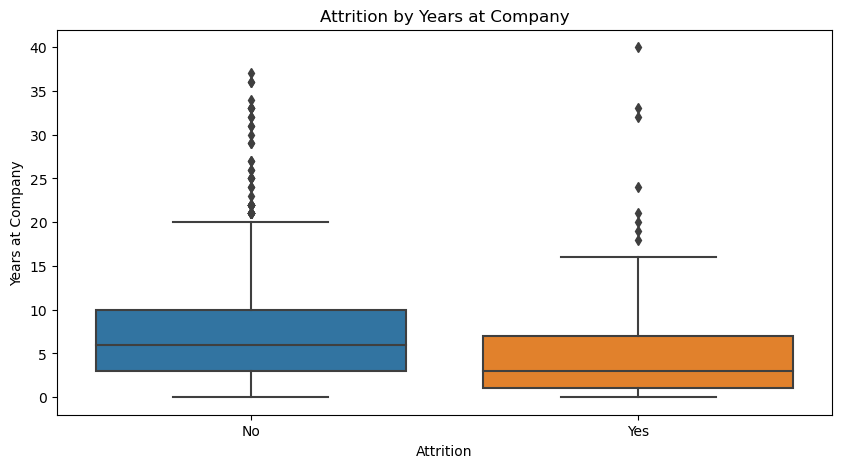

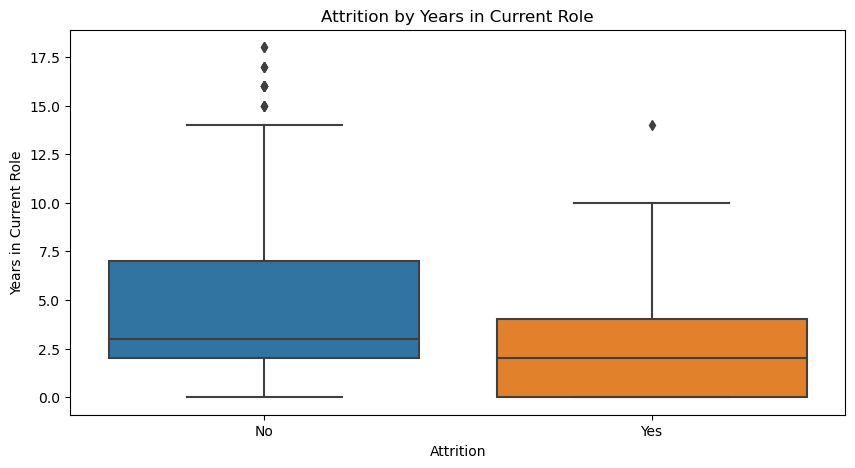

In [32]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Attrition', y='ExperienceYearsAtThisCompany', data=df)
plt.xlabel('Attrition')
plt.ylabel('Years at Company')
plt.title('Attrition by Years at Company')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Attrition', y='ExperienceYearsInCurrentRole', data=df)
plt.xlabel('Attrition')
plt.ylabel('Years in Current Role')
plt.title('Attrition by Years in Current Role')
plt.show()


# Feature selection

<AxesSubplot:>

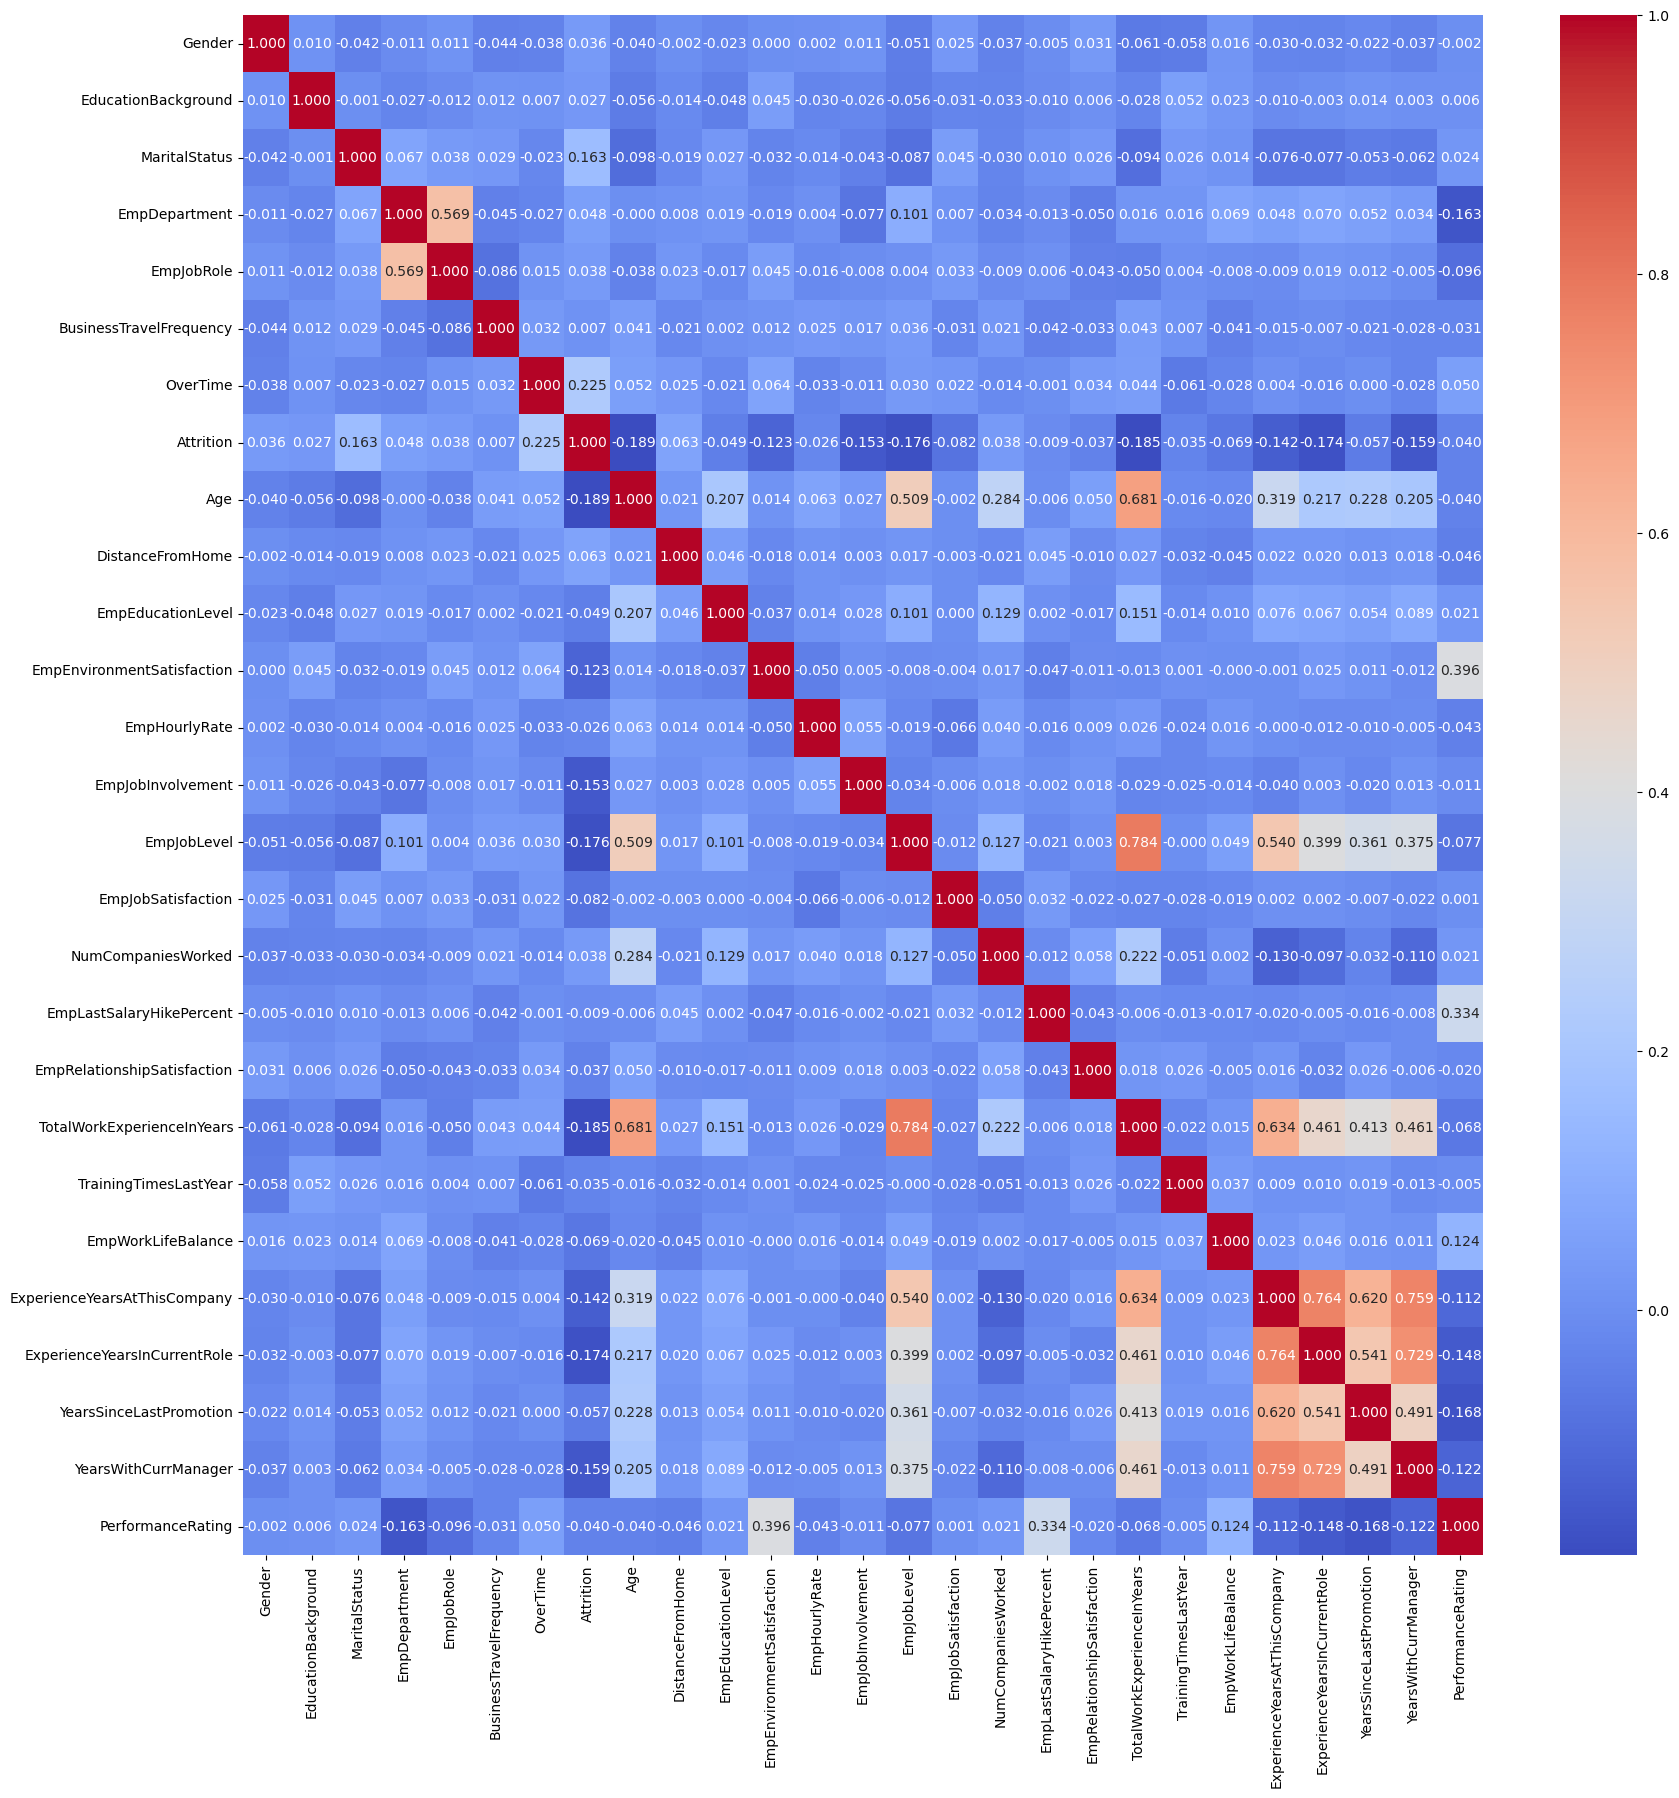

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df.corr(),annot=True,cmap='coolwarm',fmt=".3f")

In [34]:
corr=new_df.corr()['Attrition'].reset_index()
corr.sort_values('Attrition',ascending=False)

,index,Attrition
7,Attrition,1.000000
6,OverTime,0.224535
2,MaritalStatus,0.162969
9,DistanceFromHome,0.063248
3,EmpDepartment,0.048006
16,NumCompaniesWorked,0.037643
4,EmpJobRole,0.037508
0,Gender,0.035758
1,EducationBackground,0.027161
5,BusinessTravelFrequency,0.007217


<AxesSubplot:xlabel='Attrition'>

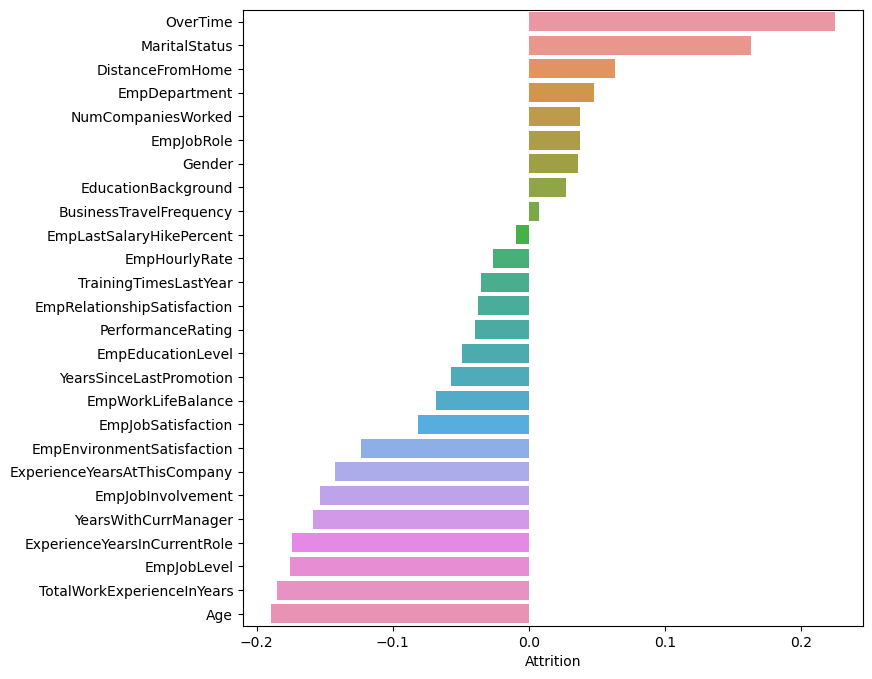

In [35]:
corelation = pd.DataFrame(new_df.corr())
corelation = pd.DataFrame(corelation['Attrition'])
corelation=corelation.sort_values('Attrition',ascending=False)
indices_to_remove = ['Attrition']
corelation = corelation.drop(indices_to_remove)
plt.figure(figsize=(8,8))
sns.barplot(x=corelation['Attrition'],y=corelation.index)

In [36]:
new_df.columns

Index(['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
       'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition', 'Age',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent',
       'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears',
       'TrainingTimesLastYear', 'EmpWorkLifeBalance',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')

In [37]:
selected_columns = [
    'OverTime', 'MaritalStatus', 'DistanceFromHome','Age','TotalWorkExperienceInYears',
    'EmpJobLevel','ExperienceYearsInCurrentRole','YearsWithCurrManager','EmpJobInvolvement',
    'ExperienceYearsAtThisCompany','EmpEnvironmentSatisfaction','Attrition'
    
]

In [38]:
att=new_df[selected_columns]
att

,OverTime,MaritalStatus,DistanceFromHome,Age,TotalWorkExperienceInYears,EmpJobLevel,ExperienceYearsInCurrentRole,YearsWithCurrManager,EmpJobInvolvement,ExperienceYearsAtThisCompany,EmpEnvironmentSatisfaction,Attrition
0,0,2,10,32,10,2,7,8,3,10,4,0
1,0,2,14,47,20,2,7,7,3,7,4,0
2,1,1,5,40,20,3,13,12,2,18,4,0
3,0,0,10,41,23,5,6,6,2,21,2,0
4,0,2,16,60,10,2,2,2,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1,0,3,27,6,2,5,4,4,6,4,0
1196,0,2,10,37,4,1,0,0,4,1,4,0
1197,1,1,28,50,20,1,8,8,4,20,4,0
1198,0,2,9,34,9,3,7,7,2,8,4,0


In [39]:
for i in att:
    print(i)
    print(att[i].unique())

OverTime
[0 1]
MaritalStatus
[2 1 0]
DistanceFromHome
[10 14  5 16  8  1 24  3 27 19  9  2  7  6 26 11 23 13 29 12  4 25 21 18
 20 17 22 28 15]
Age
[32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 52 33 25 45 23
 26 54 37 24 49 55 43 51 22 31 58 20 21 48 19 18 59 46 57]
TotalWorkExperienceInYears
[10 20 23  9  4 28  1  7 12 30  5  2 19 16 34  6  8 11 17  3 14 26 13 22
  0 29 18 35 33 31 24 15 32 21 27 25 36 37 38 40]
EmpJobLevel
[2 3 5 1 4]
ExperienceYearsInCurrentRole
[ 7 13  6  2  0  1  3  8  9  5  4 14 12 10 16 11 15 17 18]
YearsWithCurrManager
[ 8  7 12  6  2  5  0  4 13  3  1 16  9 17 11 10 14 15]
EmpJobInvolvement
[3 2 1 4]
ExperienceYearsAtThisCompany
[10  7 18 21  2  9  8  1  5 22  4  0 34  6 15  3 13 26 20 12 31 16 11 14
 17 19 32 24 33 29 25 36 30 23 27 37 40]
EmpEnvironmentSatisfaction
[4 2 1 3]
Attrition
[0 1]


# spliting a data

In [40]:
X=att.drop(['Attrition'],axis=1)
X

,OverTime,MaritalStatus,DistanceFromHome,Age,TotalWorkExperienceInYears,EmpJobLevel,ExperienceYearsInCurrentRole,YearsWithCurrManager,EmpJobInvolvement,ExperienceYearsAtThisCompany,EmpEnvironmentSatisfaction
0,0,2,10,32,10,2,7,8,3,10,4
1,0,2,14,47,20,2,7,7,3,7,4
2,1,1,5,40,20,3,13,12,2,18,4
3,0,0,10,41,23,5,6,6,2,21,2
4,0,2,16,60,10,2,2,2,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...
1195,1,0,3,27,6,2,5,4,4,6,4
1196,0,2,10,37,4,1,0,0,4,1,4
1197,1,1,28,50,20,1,8,8,4,20,4
1198,0,2,9,34,9,3,7,7,2,8,4


In [41]:
y=att['Attrition']
y

0       0
1       0
2       0
3       0
4       0
       ..
1195    0
1196    0
1197    0
1198    0
1199    1
Name: Attrition, Length: 1200, dtype: int32

<AxesSubplot:xlabel='Attrition', ylabel='count'>

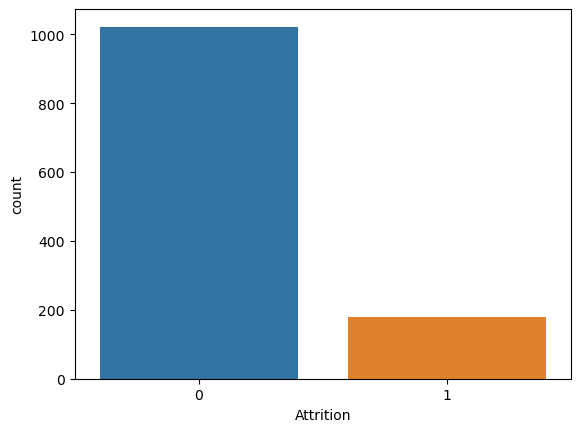

In [42]:
sns.countplot(att['Attrition'])

In [43]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_sampled,y_sampled=sm.fit_resample(X,y)

Text(0, 0.5, 'counts')

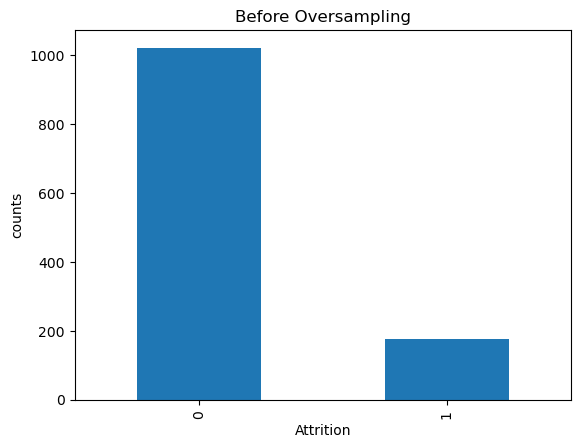

In [44]:
att['Attrition'].value_counts().plot(kind='bar')
plt.title("Before Oversampling")
plt.xlabel('Attrition')
plt.ylabel('counts')

Text(0, 0.5, 'counts')

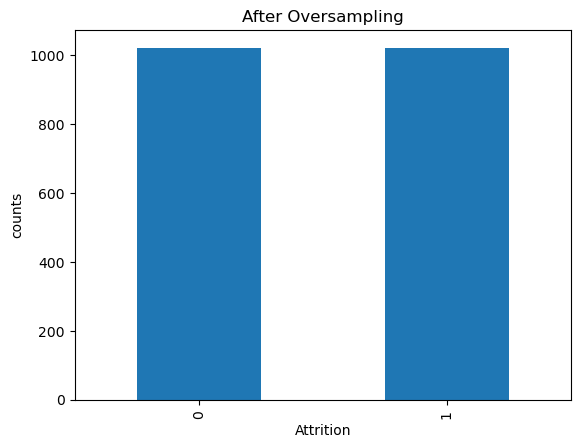

In [45]:
y_sampled.value_counts().plot(kind='bar')
plt.title("After Oversampling")
plt.xlabel('Attrition')
plt.ylabel('counts')

# Train and Test data

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X_sampled,y_sampled,test_size=0.2,random_state=42)

In [48]:
Xtrain.shape , Xtest.shape

((1635, 11), (409, 11))

In [49]:
ytrain.shape , ytest.shape

((1635,), (409,))

# Scaling

In [50]:
from sklearn.preprocessing import StandardScaler
se=StandardScaler()

In [51]:
from sklearn.preprocessing import StandardScaler
se=StandardScaler()
Xtrain=se.fit_transform(Xtrain)
Xtest=se.fit_transform(Xtest)

# Training models

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve

In [53]:
knn=KNeighborsClassifier(n_neighbors=3)
lr=LogisticRegression()
dt=DecisionTreeClassifier()
ra=RandomForestClassifier()
ad=AdaBoostClassifier()
svm=SVC(probability=True)
gau=GaussianNB()
bag=BaggingClassifier()
Gr=GradientBoostingClassifier()


In [54]:
Training_score= []
Testing_score= []
def model_building(model):
    model.fit(Xtrain, ytrain)
    ytrain_pred= model.predict(Xtrain)
    ytest_pred= model.predict(Xtest)
    a= accuracy_score(ytrain, ytrain_pred)
    b= accuracy_score(ytest, ytest_pred)
    Training_score.append(a)
    Testing_score.append(b)
    print(model)
    print("Train Data\n", accuracy_score(ytrain,ytrain_pred))
    print("Test Data\n", accuracy_score(ytest,ytest_pred))

In [55]:
model_building(knn)


KNeighborsClassifier(n_neighbors=3)
Train Data
 0.9180428134556575
Test Data
 0.823960880195599


In [56]:
model_building(lr)

LogisticRegression()
Train Data
 0.7626911314984709
Test Data
 0.7701711491442543


In [57]:
model_building(dt)

DecisionTreeClassifier()
Train Data
 0.999388379204893
Test Data
 0.8019559902200489


In [58]:
model_building(ra)

RandomForestClassifier()
Train Data
 0.999388379204893
Test Data
 0.8899755501222494


In [59]:
model_building(ad)

AdaBoostClassifier()
Train Data
 0.8128440366972477
Test Data
 0.80440097799511


In [60]:
model_building(svm)

SVC(probability=True)
Train Data
 0.8574923547400611
Test Data
 0.8459657701711492


In [61]:
model_building(gau)

GaussianNB()
Train Data
 0.7015290519877676
Test Data
 0.6992665036674817


In [62]:
model_building(bag)

BaggingClassifier()
Train Data
 0.9926605504587156
Test Data
 0.8655256723716381


In [63]:
model_building(Gr)

GradientBoostingClassifier()
Train Data
 0.8862385321100917
Test Data
 0.8386308068459658


In [64]:
Models= ["k-Nearest Neighbors","Logistic Regression" ,"Decision Tree Classifier", "Random forest Classifier" ,
        "Ada-Boosting Classifier","svm","GaussianNB","Bagging Classifier", "Gradiant- Bossting Classifier"]

In [65]:
new_df1 = pd.DataFrame({"Algorithms":Models,
                   "Training Score":Training_score,
                   "Testing Score":Testing_score,})

In [66]:
new_df1

,Algorithms,Training Score,Testing Score
0,k-Nearest Neighbors,0.918043,0.823961
1,Logistic Regression,0.762691,0.770171
2,Decision Tree Classifier,0.999388,0.801956
3,Random forest Classifier,0.999388,0.889976
4,Ada-Boosting Classifier,0.812844,0.804401
5,svm,0.857492,0.845966
6,GaussianNB,0.701529,0.699267
7,Bagging Classifier,0.992661,0.865526
8,Gradiant- Bossting Classifier,0.886239,0.838631


# Hypertunning

# Random forest

In [67]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
ra=RandomForestClassifier()

In [69]:
random_forest_params = {
    'n_estimators': [25,50,75,100],
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [2, 5, 10],
    'criterion': ["gini", "entropy"],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'class_weight' : ["balanced", "balanced_subsample"]
    
}

In [70]:
ra_reg=RandomizedSearchCV(ra,param_distributions=random_forest_params,random_state=42,scoring='accuracy',cv=5,n_jobs=-1)

In [71]:
model_building(ra_reg)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [25, 50, 75, 100]},
                   random_state=42, scoring='accuracy')
Train Data
 0.9247706422018349
Test Data
 0.8679706601466992


# gaussianNB

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

In [73]:
gau=GaussianNB()

In [74]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
    'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2]]
}


In [75]:
gau_reg=GridSearchCV(gau,param_grid=param_grid,cv=5,n_jobs=-1,scoring='accuracy')

In [76]:
gau_reg.fit(Xtrain,ytrain)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2]],
                         'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')

In [77]:
model_building(gau_reg)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2]],
                         'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')
Train Data
 0.728440366972477
Test Data
 0.7286063569682152


# SVM

In [78]:
svm=SVC(probability=True)
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1],
    'degree': [2, 3, 4]
    
}

In [79]:
svm_reg = RandomizedSearchCV(svm, param_distributions=param_grid, n_iter=10, cv=5,n_jobs=-1)

In [80]:
model_building(svm_reg)

RandomizedSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto', 0.1, 1],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})
Train Data
 0.9217125382262997
Test Data
 0.8704156479217604


# Gradient Boosting

In [81]:
param_grid_classification = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'loss': ['deviance', 'exponential']
}

In [82]:
gr_reg=RandomizedSearchCV(Gr,param_distributions=param_grid_classification,random_state=42,scoring='accuracy',cv=5,n_jobs=-1)

In [83]:
model_building(gr_reg)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [3, 4, 5],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='accuracy')
Train Data
 0.998776758409786
Test Data
 0.902200488997555


# Logictics Regression

In [84]:
param_grid = {
    'C':np.arange(1,51),
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga','newton-cg'],
    'penalty': ['l1', 'l2','elasticnet',None],
    'max_iter': [30,40,50,100, 200, 300],'class_weight':[None,'balanced'],'random_state':[42],
    'multi_class':['auto','ovr','multinomial']
}

In [85]:
lr_reg=RandomizedSearchCV(lr,param_distributions=param_grid,random_state=42,scoring='accuracy',cv=5,n_jobs=-1)

In [86]:
model_building(lr_reg)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                                        'class_weight': [None, 'balanced'],
                                        'max_iter': [30, 40, 50, 100, 200, 300],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'random_state': [42],
                                        'solver': ['lbfgs', 'liblinear', 'sag',
                                                   'saga', 'newton-cg']},
           

# We select random forest as a best algorithm

In [87]:
att.head(8)

,OverTime,MaritalStatus,DistanceFromHome,Age,TotalWorkExperienceInYears,EmpJobLevel,ExperienceYearsInCurrentRole,YearsWithCurrManager,EmpJobInvolvement,ExperienceYearsAtThisCompany,EmpEnvironmentSatisfaction,Attrition
0,0,2,10,32,10,2,7,8,3,10,4,0
1,0,2,14,47,20,2,7,7,3,7,4,0
2,1,1,5,40,20,3,13,12,2,18,4,0
3,0,0,10,41,23,5,6,6,2,21,2,0
4,0,2,16,60,10,2,2,2,3,2,1,0
5,0,0,10,27,9,3,7,7,3,9,4,0
6,0,1,8,50,4,1,2,2,3,2,4,0
7,1,2,1,28,10,1,7,7,1,7,1,1


In [88]:
new_data2 = {
    'OverTime': [1],  
    'MaritalStatus': [2],  
    'DistanceFromHome': [1],  
    'Age': [28], 
    'TotalWorkExperienceInYears': [10],  
    'EmpJobLevel': [1],  
    'ExperienceYearsInCurrentRole': [7],  
    'YearsWithCurrManager': [7],  
    'EmpJobInvolvement': [1], 
    'ExperienceYearsAtThisCompany': [7],  
    'EmpEnvironmentSatisfaction': [1]  
}

In [89]:
new_data = {
    'OverTime': [1],  # Example: 1 indicates 'Yes' for OverTime
    'MaritalStatus': [2],  # Example: 2 indicates 'Married' for MaritalStatus
    'DistanceFromHome': [5],  # Example: 5 for DistanceFromHome
    'Age': [30],  # Example: 30 for Age
    'TotalWorkExperienceInYears': [10],  # Example: 10 for TotalWorkExperienceInYears
    'EmpJobLevel': [3],  # Example: 3 for EmpJobLevel
    'ExperienceYearsInCurrentRole': [7],  # Example: 7 for ExperienceYearsInCurrentRole
    'YearsWithCurrManager': [8],  # Example: 8 for YearsWithCurrManager
    'EmpJobInvolvement': [3],  # Example: 3 for EmpJobInvolvement
    'ExperienceYearsAtThisCompany': [10],  # Example: 10 for ExperienceYearsAtThisCompany
    'EmpEnvironmentSatisfaction': [4]  # Example: 4 for EmpEnvironmentSatisfaction
}

In [90]:
new_data = pd.DataFrame(new_data)

In [91]:
scaled_new_data = se.transform(new_data)

In [92]:
predictions = ra_reg.predict(scaled_new_data)
predictions[0]

0

In [93]:
new_data2 = pd.DataFrame(new_data2)

In [94]:
scaled_new_data2 = se.transform(new_data2)

In [95]:
predictions2 = ra_reg.predict(scaled_new_data2)
predictions2[0]

1

In [96]:
import pickle

In [97]:
pickle.dump(ra_reg,open('attritionmodel2.pkl','wb'))
pickle.dump(se,open('attritionscaling2.pkl','wb'))